# Lancement de l'outil

In [0]:
# Import

import os
import sys
import cv2
import glob
import time
import shutil     
from PIL import Image
import numpy as np
import matplotlib
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

#Import du projet
url = "https://github.com/kayou11/Projet-Datascience.git"
os.system('git clone %s' %url)

#Import du Model
sys.path.append("Projet-Datascience") 
from Model.pix2pix import Pix2Pix
from Model.image_colorization import colorGen



In [0]:
def affiche(image):
        plt.imshow(image)
        plt.axis("off")
        plt.show

In [0]:
# Fonction principale pour lancer la procédure de traitement d'images

def lancement_processus(path, noirBlanc=False):

  list_rep = creation_arbo()
  path_images = list_rep[3]
  path_resultat = list_rep[2]
  deplacer_photo(path, path_images)
  if noirBlanc: 
    list_image_degraded = chargement_image_NoirBlanc(path_images)
    list_image_clean = appel_IA_colorization(list_image_degraded)
         
  else:
    list_image_degraded = chargement_image(path_images)
    list_image_clean = appel_IA(list_image_degraded)
    save_image(path_resultat, list_image_clean)
  
  

# Mise en place de l'arborescence des répertoires

In [0]:
# Fonction de création de l'arborescence

def creation_arbo():

  # Liste des répertoire à créer pour mettre en place l'arborescence necessaire aux images en entrées/sorties
  list_rep = ["/content/Data", "/content/Data/Photo", "/content/Data/Photo/Resultat", "/content/Data/Photo/Images", "/content/Data/Video", "/content/Data/Video/Resultat", "/content/Data/Video/Video", "/content/Data/Video/Frames", "/content/Data/Video/CleanFrames"]
  for filename in list_rep: 
    create_rep(filename)  # Appel de la fonction de création d'un répertoire
  
  return list_rep # Permet de retrouver l'emplacement des images en entrées


In [0]:
# Fonction de création d'un répertoire

def create_rep(filename):

  # Vérification de l'existence du répertoire avant sa création
  if not os.path.exists(filename):
    os.makedirs(filename) # Création du répertoire


# Déplacement des photos de l'utilisateur vers le répertoire d'entrée

In [0]:
# Fonction pour déplacer les images dans le bon répertoire

def deplacer_photo(path, path_images):
  for filename in os.listdir(path):
    os.replace(path+'/'+filename, path_images+'/'+filename) #Déplacement de la photo (rep1 ==> rep2)
  

# Chargement des images pour traitement

In [0]:
# Récupération des images

def chargement_image(path_images):

  list_image = [] # Liste des images récupérées à traiter
  for element in sorted(glob.glob(path_images+'/*.jpg')):
    image = cv2.imread(element)  # Récupération de l'image
    image = cv2.resize(image, (128, 128))
    list_image.append(image)  # Ajout de l'image dans la liste
  return list_image


In [0]:
# Récupération des images

def chargement_image_NoirBlanc(path_images):

  list_image = [] # Liste des images récupérées à traiter
  for element in sorted(glob.glob(path_images+'/*.jpg')):
    image = cv2.imread(element)  # Récupération de l'image
    image = cv2.resize(image, (256, 256))
    list_image.append(image)  # Ajout de l'image dans la liste
  return list_image

# Traitement des images par l'IA

In [0]:
# Fonction qui envoie les images à l'IA pour être traitées

def appel_IA(liste_image_degraded):

  model = Pix2Pix().build_generator()
  model.load_weights('/content/drive/My Drive/Projet DataScience/poids/weights_generator.h5')

  liste_image_degraded = np.array(liste_image_degraded)/127.5-1.

  list_image_clean = model.predict(liste_image_degraded)
  list_image_clean = 0.5 * np.asarray(list_image_clean) + 0.5

  return list_image_clean

In [0]:
# Fonction qui envoie les images à l'IA pour être coloriser

def appel_IA_colorization(liste_image_noir_blanc):

  liste_image_noir_blanc = np.array(liste_image_noir_blanc)/127.5-1.
  model = colorGen()
  list_image_clean = model.test(liste_image_noir_blanc)

  return list_image_clean

# Récupération et sauvegarde des images traitées

In [0]:
# Fonction pour sauvegarder les images traitées

def save_image(path_resultat, list_image_clean):
  
  i=1   # Permet de donner un identifiant à l'image   
  for element in list_image_clean:
    element = element*255
    element = element.astype('uint8')
    cv2.imwrite(path_resultat+'/image'+str(i)+".jpg", element)  # Enregistrement de l'image dans le dossier adéquat
    affiche(element)
    i = i + 1


# Outil de traitement d'images

In [26]:
#@title Veuillez renseigner le chemin des photos à traiter
chemin = "" #@param {type:"string"}

path = chemin

start_time = time.time()
lancement_processus(path)
print("Temps d execution : %s secondes ---" % (time.time() - start_time)) # Affichage du temps d'exécution

FileNotFoundError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


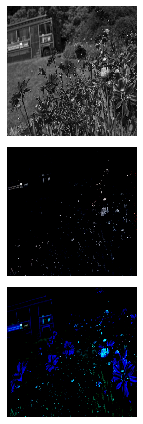

Temps d execution : 48.18711805343628 secondes ---


In [27]:
#@title Veuillez renseigner le chemin des photos en noir et blanc à traiter
chemin = "/content/set" #@param {type:"string"}

path = chemin

start_time = time.time()
lancement_processus(path, True)
print("Temps d execution : %s secondes ---" % (time.time() - start_time)) # Affichage du temps d'exécution